In [ ]:
%run -i "download_dataset.py"

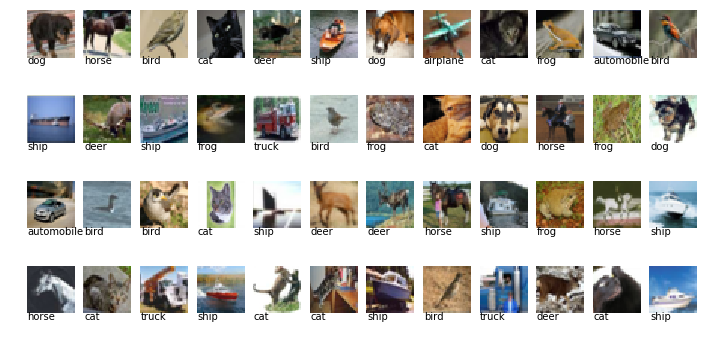

In [1]:
from classifiers.data_set_deserializer import get_data_set, visualize
data_set = get_data_set()
X = data_set.training_pictures
Y = data_set.get_training_labels_text()
visualize(X, Y, (4, 10))

In [1]:
%run -i "classifiers/hog_svm.py"

/home/keras/workspace/mac_rl/tooplox_classifier/serialized_features/hog_train_pictures.npy loaded
/home/keras/workspace/mac_rl/tooplox_classifier/serialized_features/hog_test_pictures.npy loaded
Number of features: 1568
Accuracy = 53.41% (5341/10000) (classification)
successfully ends
